In [ ]:
# Core libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.ensemble import IsolationForest
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix


In [ ]:
df = pd.read_csv("/content/creditcard.csv")

In [ ]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0.0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0.0
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0.0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0.0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0.0


In [ ]:
# Features and labels
X = df.drop(['Class'], axis=1)
y = df['Class']  # 1 = fraud (anomaly), 0 = normal

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
# Initialize and train the model
model = IsolationForest(n_estimators=100, contamination=0.002, random_state=42)
model.fit(X_train)

# Predict anomalies
predictions = model.predict(X_test)

# Convert -1 (anomaly) to 1, and 1 (normal) to 0 to match the dataset labels
predicted = [1 if x == -1 else 0 for x in predictions]


In [ ]:
# IsolationForest returns -1 (anomaly) and 1 (normal)
predictions = model.predict(X_test)

# Convert to match 'Class' labels: 1 = fraud, 0 = normal
predicted = [1 if x == -1 else 0 for x in predictions]


In [ ]:
print("y_test:", len(y_test))
print("predicted:", len(predicted))


y_test: 39835
predicted: 39836


In [ ]:
predicted = predicted[:len(y_test)]  # truncate if it's 1 longer


In [ ]:
# Convert y_test to 1D Pandas Series
y_test = pd.Series(y_test.ravel()).reset_index(drop=True)


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     39754
         1.0       0.27      0.28      0.28        81

    accuracy                           1.00     39835
   macro avg       0.63      0.64      0.64     39835
weighted avg       1.00      1.00      1.00     39835



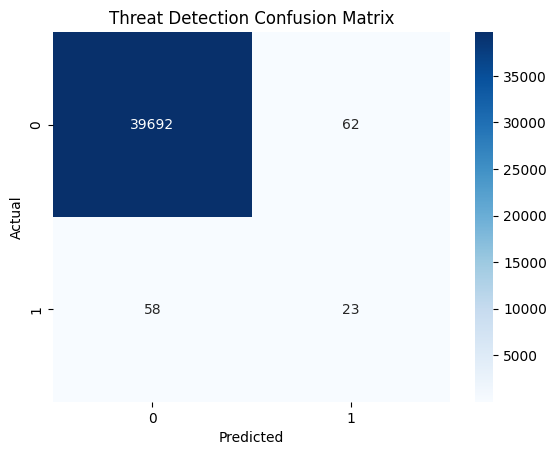

In [ ]:
print(classification_report(y_test, predicted))

cm = confusion_matrix(y_test, predicted)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Threat Detection Confusion Matrix")
plt.show()


In [ ]:
# Simulate response to first 20 predictions
for i in range(20):
    actual = y_test[i]
    is_threat = predicted[i]

    if is_threat == 1:
        print(f"[ALERT] 🚨 Threat Detected at index {i} | Actual: {actual} | Action: Account Locked 🔐 & Admin Notified 📩")
    else:
        print(f"[OK] ✅ Normal activity at index {i} | Actual: {actual}")


[OK] ✅ Normal activity at index 0 | Actual: 0.0
[OK] ✅ Normal activity at index 1 | Actual: 0.0
[OK] ✅ Normal activity at index 2 | Actual: 0.0
[OK] ✅ Normal activity at index 3 | Actual: 0.0
[OK] ✅ Normal activity at index 4 | Actual: 0.0
[OK] ✅ Normal activity at index 5 | Actual: 0.0
[OK] ✅ Normal activity at index 6 | Actual: 0.0
[OK] ✅ Normal activity at index 7 | Actual: 0.0
[OK] ✅ Normal activity at index 8 | Actual: 0.0
[OK] ✅ Normal activity at index 9 | Actual: 0.0
[OK] ✅ Normal activity at index 10 | Actual: 0.0
[OK] ✅ Normal activity at index 11 | Actual: 0.0
[OK] ✅ Normal activity at index 12 | Actual: 0.0
[OK] ✅ Normal activity at index 13 | Actual: 0.0
[OK] ✅ Normal activity at index 14 | Actual: 0.0
[OK] ✅ Normal activity at index 15 | Actual: 0.0
[OK] ✅ Normal activity at index 16 | Actual: 0.0
[OK] ✅ Normal activity at index 17 | Actual: 0.0
[OK] ✅ Normal activity at index 18 | Actual: 0.0
[OK] ✅ Normal activity at index 19 | Actual: 0.0


In [ ]:
incident_log = []

for i in range(len(predicted)):
    entry = {
        'Index': i,
        'Actual_Label': int(y_test[i]),  # ✅ No .iloc here
        'Predicted_Label': predicted[i],
        'Status': 'Threat Detected' if predicted[i] == 1 else 'Normal',
        'Action_Taken': 'Account Locked & Alert Sent' if predicted[i] == 1 else 'No Action',
        'Compliance_Flag': 'Review Required' if predicted[i] == 1 else 'OK'
    }
    incident_log.append(entry)

# Convert to DataFrame
incident_df = pd.DataFrame(incident_log)
incident_df.head()


,Index,Actual_Label,Predicted_Label,Status,Action_Taken,Compliance_Flag
0,0,0,0,Normal,No Action,OK
1,1,0,0,Normal,No Action,OK
2,2,0,0,Normal,No Action,OK
3,3,0,0,Normal,No Action,OK
4,4,0,0,Normal,No Action,OK


In [ ]:
# Define user roles and permissions
roles = {
    "admin": ["view_logs", "access_dashboard", "initiate_response"],
    "analyst": ["view_logs", "access_dashboard"],
    "user": ["access_dashboard"]
}

# Simulated users and their roles
users = {
    "alice": "admin",
    "bob": "analyst",
    "charlie": "user"
}

# Access check function
def check_access(username, action):
    role = users.get(username, None)
    if role:
        permissions = roles[role]
        if action in permissions:
            print(f"[ACCESS GRANTED ✅] {username} ({role}) can perform '{action}'")
        else:
            print(f"[ACCESS DENIED ❌] {username} ({role}) cannot perform '{action}'")
    else:
        print(f"[ERROR 🚫] User '{username}' not found.")

# Test access
check_access("alice", "view_logs")         # ✅ Allowed
check_access("bob", "initiate_response")   # ❌ Denied
check_access("charlie", "view_logs")       # ❌ Denied
check_access("charlie", "access_dashboard")# ✅ Allowed


[ACCESS GRANTED ✅] alice (admin) can perform 'view_logs'
[ACCESS DENIED ❌] bob (analyst) cannot perform 'initiate_response'
[ACCESS DENIED ❌] charlie (user) cannot perform 'view_logs'
[ACCESS GRANTED ✅] charlie (user) can perform 'access_dashboard'


In [ ]:
# Only admins can export incident reports
def export_incident_report(user):
    role = users.get(user, "guest")
    if "initiate_response" in roles.get(role, []):
        print(f"[EXPORTING 📤] Incident report exported by {user}.")
        # Code to export (you've already done this in Step 8)
    else:
        print(f"[DENIED ❌] {user} does not have permission to export reports.")

# Try exporting
export_incident_report("bob")      # Analyst – denied
export_incident_report("alice")    # Admin – allowed


[DENIED ❌] bob does not have permission to export reports.
[EXPORTING 📤] Incident report exported by alice.


In [ ]:
# User Training Interface - Cybersecurity Awareness Quiz

def cybersecurity_quiz():
    print("🔐 Welcome to the Cybersecurity Awareness Quiz!")
    print("Answer the following questions by typing A, B, C, or D.\n")

    questions = [
        {
            "question": "1. What is the most secure way to store passwords?",
            "options": ["A. Write them on a sticky note", "B. Use the same password everywhere",
                        "C. Use a password manager", "D. Memorize one short password"],
            "answer": "C"
        },
        {
            "question": "2. Which of the following is a sign of a phishing email?",
            "options": ["A. Personalized greeting", "B. Unexpected attachment",
                        "C. Email from your boss", "D. Secure domain name"],
            "answer": "B"
        },
        {
            "question": "3. What should you do if you suspect a security breach?",
            "options": ["A. Ignore it", "B. Post about it online",
                        "C. Report it to IT/security team", "D. Try to fix it yourself"],
            "answer": "C"
        },
        {
            "question": "4. Which is considered good practice?",
            "options": ["A. Sharing passwords with coworkers", "B. Clicking unknown links",
                        "C. Enabling multi-factor authentication", "D. Using the same password for work and personal accounts"],
            "answer": "C"
        }
    ]

    score = 0

    for q in questions:
        print(q["question"])
        for opt in q["options"]:
            print(opt)
        answer = input("Your answer: ").strip().upper()
        if answer == q["answer"]:
            print("✅ Correct!\n")
            score += 1
        else:
            print(f"❌ Incorrect! The correct answer was {q['answer']}.\n")

    print(f"🧾 Quiz Complete! Your Score: {score}/{len(questions)}")

    # Training completion log
    if score >= 3:
        print("🎉 Training Passed – You are cybersecurity aware!")
    else:
        print("⚠️ Please review the security policies and retake the quiz.")

# Run the quiz
cybersecurity_quiz()


🔐 Welcome to the Cybersecurity Awareness Quiz!
Answer the following questions by typing A, B, C, or D.

1. What is the most secure way to store passwords?
A. Write them on a sticky note
B. Use the same password everywhere
C. Use a password manager
D. Memorize one short password


In [ ]:
import csv
from datetime import datetime

def log_training_result(username, score, total):
    with open("user_training_log.csv", "a", newline="") as file:
        writer = csv.writer(file)
        writer.writerow([username, score, total, datetime.now().strftime("%Y-%m-%d %H:%M:%S")])


In [ ]:
log_training_result("alice", score, len(questions))


In [2]:
!pip install streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.8/9.8 MB 33.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 29.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 3.6 MB/s eta 0:00:00


In [3]:
import streamlit as st
import pandas as pd
import numpy as np
from sklearn.ensemble import IsolationForest
import matplotlib.pyplot as plt
import seaborn as sns
from io import BytesIO

# Set up Streamlit page
st.set_page_config(page_title="🛡️ Threat Detection Dashboard", layout="centered")
st.title("🛡️ AI-Powered Threat Detection System")

# Sidebar navigation
st.sidebar.title("🔍 Navigation")
section = st.sidebar.radio("Go to", ["Upload & Detect", "Awareness Quiz", "About"])
role = st.sidebar.selectbox("🔐 Login as", ["Admin", "Analyst", "User"])

# Shared variables
data = None

# === SECTION: Upload & Detect ===
if section == "Upload & Detect":
    st.subheader("📁 Upload Logs")
    uploaded_file = st.file_uploader("Upload a CSV log file", type=["csv"])

    if uploaded_file:
        data = pd.read_csv(uploaded_file)
        st.success("Log file uploaded!")
        st.write("Preview of data:")
        st.dataframe(data.head())

        # Drop label column if exists
        if "Class" in data.columns:
            X = data.drop("Class", axis=1)
        else:
            X = data.copy()

        st.subheader("🚨 Run Threat Detection")
        if st.button("Detect Threats"):
            model = IsolationForest(n_estimators=100, contamination=0.002, random_state=42)
            model.fit(X)
            predictions = model.predict(X)
            predicted = [1 if x == -1 else 0 for x in predictions]

            data["Threat_Detected"] = predicted
            threat_count = sum(predicted)

            # Display metrics
            col1, col2 = st.columns(2)
            col1.metric("🚫 Threats Detected", threat_count)
            col2.metric("✅ Normal Logs", len(data) - threat_count)

            # Show updated table
            st.subheader("📊 Detection Results")
            st.dataframe(data.tail(10))

            # Chart
            fig, ax = plt.subplots()
            sns.countplot(x=predicted, ax=ax)
            ax.set_xticklabels(["Normal", "Threat"])
            ax.set_title("Detection Summary")
            st.pyplot(fig)

            # Download
            csv = data.to_csv(index=False).encode('utf-8')
            st.download_button("⬇️ Download Report", csv, "incident_report.csv", "text/csv")

# === SECTION: Awareness Quiz ===
elif section == "Awareness Quiz":
    st.subheader("🧠 Cybersecurity Awareness Quiz")

    questions = [
        {
            "question": "What’s the best way to manage passwords?",
            "options": ["Use same password everywhere", "Sticky notes", "Password manager", "Share with coworkers"],
            "answer": "Password manager"
        },
        {
            "question": "Which of these is a sign of phishing?",
            "options": ["Secure domain", "Email from boss", "Unexpected attachment", "Good grammar"],
            "answer": "Unexpected attachment"
        },
        {
            "question": "What should you do if you suspect a breach?",
            "options": ["Ignore it", "Fix it yourself", "Report to IT", "Log out and pray"],
            "answer": "Report to IT"
        },
    ]

    score = 0
    for q in questions:
        user_answer = st.radio(q["question"], q["options"], key=q["question"])
        if user_answer == q["answer"]:
            st.success("✅ Correct")
            score += 1
        else:
            st.error(f"❌ Incorrect – Correct answer: {q['answer']}")

    if st.button("Submit Quiz"):
        st.markdown(f"### Your Score: {score} / {len(questions)}")
        if score >= 2:
            st.success("🎉 Training Passed – Well done!")
        else:
            st.warning("⚠️ Please review cybersecurity policies and retake the quiz.")

# === SECTION: About ===
elif section == "About":
    st.subheader("📘 About This System")
    st.markdown("""
This is a prototype AI-based Threat Detection and Incident Response System, built for academic and awareness purposes.
It allows:
- Uploading of network/system logs
- AI-based anomaly detection using Isolation Forest
- Simulated incident response
- Role-based access views
- User awareness training via quiz
""")
    st.markdown("Made with ❤️ using Streamlit")

# Footer
st.markdown("---")
st.caption("📍 MSc Cybersecurity Project • Deployed with Streamlit Cloud")


2025-03-28 13:04:38.438 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 13:04:38.443 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 13:04:38.781 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-03-28 13:04:38.785 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 13:04:38.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 13:04:38.787 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-28 13:04:38.791 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when runn

DeltaGenerator()